# 🎓 Assignment 3
## ✅ Rename the filename with your roll number. E.g. if your roll number is `MT24003` then rename the file `MT24003_a3.ipynb` before submitting.
## ✅ Write code only in the sections marked with `# YOUR CODE HERE`. No, you can NOT write code anywhere else.
## ✅ Download and extract the `MLA3_DATA.zip` folder next to this file. If you extract it correctly, you will have a `MLA3_DATA` folder next to this file.
## ❌ Do not modify any other function or class definitions; doing so may lead to the autograder failing to judge your submission, resulting in a zero.
## ❌ Deleting or adding new cells may lead to the `autograder` failing to judge your submission, resulting in a zero. Even if a cell is empty, do NOT delete it.
## ❌ Do NOT install / import any other libraries. You should be able to solve all the questions using only the libraries imported below.


In [20]:
# =======================
# DO NOT MODIFY THIS CELL
# =======================

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
import scipy

# Base paths
PATH_TO_DATA_DIR = "./MLA3_DATA"
PATH_TO_TRAIN_DIR = os.path.join(PATH_TO_DATA_DIR, "TRAIN")
PATH_TO_TEST_DIR = os.path.join(PATH_TO_DATA_DIR, "TEST")

# Train and Test CSV paths
PATH_TO_TRAIN_FILE = os.path.join(PATH_TO_TRAIN_DIR, "train.csv")
PATH_TO_STUDENT_TEST_FILE = os.path.join(PATH_TO_TEST_DIR, "student_test.csv")
PATH_TO_HIDDEN_TEST_SAMPLE_FILE = os.path.join(PATH_TO_TEST_DIR, "hidden_test_sample.csv")


# `q0` EDA

* The dataset in this assignment mimics a real-world dataset and contains various artifacts, such as missing values, categorical features, and outliers.
* Your task is to train three models: Decision Tree, Gradient Boosting, and SVM. The trained models will be tested on both a visible test set and a hidden test set, which will not be accessible to you.
* To help you apply consistent preprocessing across the train, student test, and hidden test sets, we provide a very small sample of the hidden test data (3 rows). **This sample is only for sanity-checking your preprocessing code; your marks will be based on the performance of your notebook on the full hidden test dataset (~100 rows) when it is re-run after the submission deadline.**
* Additionally, the given hidden test sample does not contain the label column, so you will not be able to evaluate your model on it. Think of this dataset as the *live* data your model will experience after deployment in the wild.
* This assignment is designed to build your intuition for real-world data, highlight the importance of EDA and feature engineering, and illustrate concepts such as generalizability and overfitting.
* Given the peculiar nature of the dataset, you are strongly encouraged to do it for your own understanding.

### Grading:
* This question is not graded.

Loaded train data: (510, 15)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,class
0,26.08,8.665,u,g,aa,v,1.415,t,f,0,f,g,160.0,150,1
1,28.92,0.375,u,g,c,v,0.290,f,f,0,f,g,220.0,140,0
2,20.83,0.500,y,p,e,dd,1.000,f,f,0,f,g,260.0,0,0
3,22.17,12.125,u,g,c,v,3.335,f,t,2,t,g,180.0,173,0
4,54.33,6.750,u,g,c,h,2.625,t,t,11,t,g,0.0,284,1



Column types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      483 non-null    float64
 1   A2      510 non-null    float64
 2   A3      495 non-null    object 
 3   A4      495 non-null    object 
 4   A5      484 non-null    object 
 5   A6      484 non-null    object 
 6   A7      510 non-null    float64
 7   A8      510 non-null    object 
 8   A9      510 non-null    object 
 9   A10     510 non-null    int64  
 10  A11     495 non-null    object 
 11  A12     510 non-null    object 
 12  A13     497 non-null    float64
 13  A14     510 non-null    int64  
 14  class   510 non-null    int64  
dtypes: float64(4), int64(3), object(8)
memory usage: 59.9+ KB
None

Columns with missing values:
A1     27
A6     26
A5     26
A4     15
A3     15
A11    15
A13    13
dtype: int64

Class distribution:
class
0    280
1    230
Name:

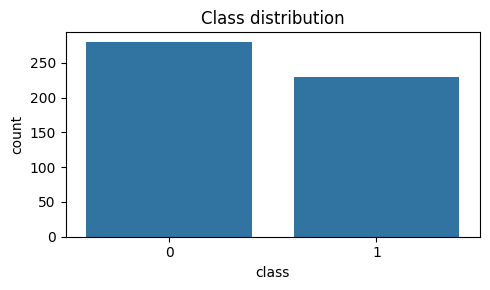


Numeric columns (6): ['A1', 'A2', 'A7', 'A10', 'A13', 'A14']


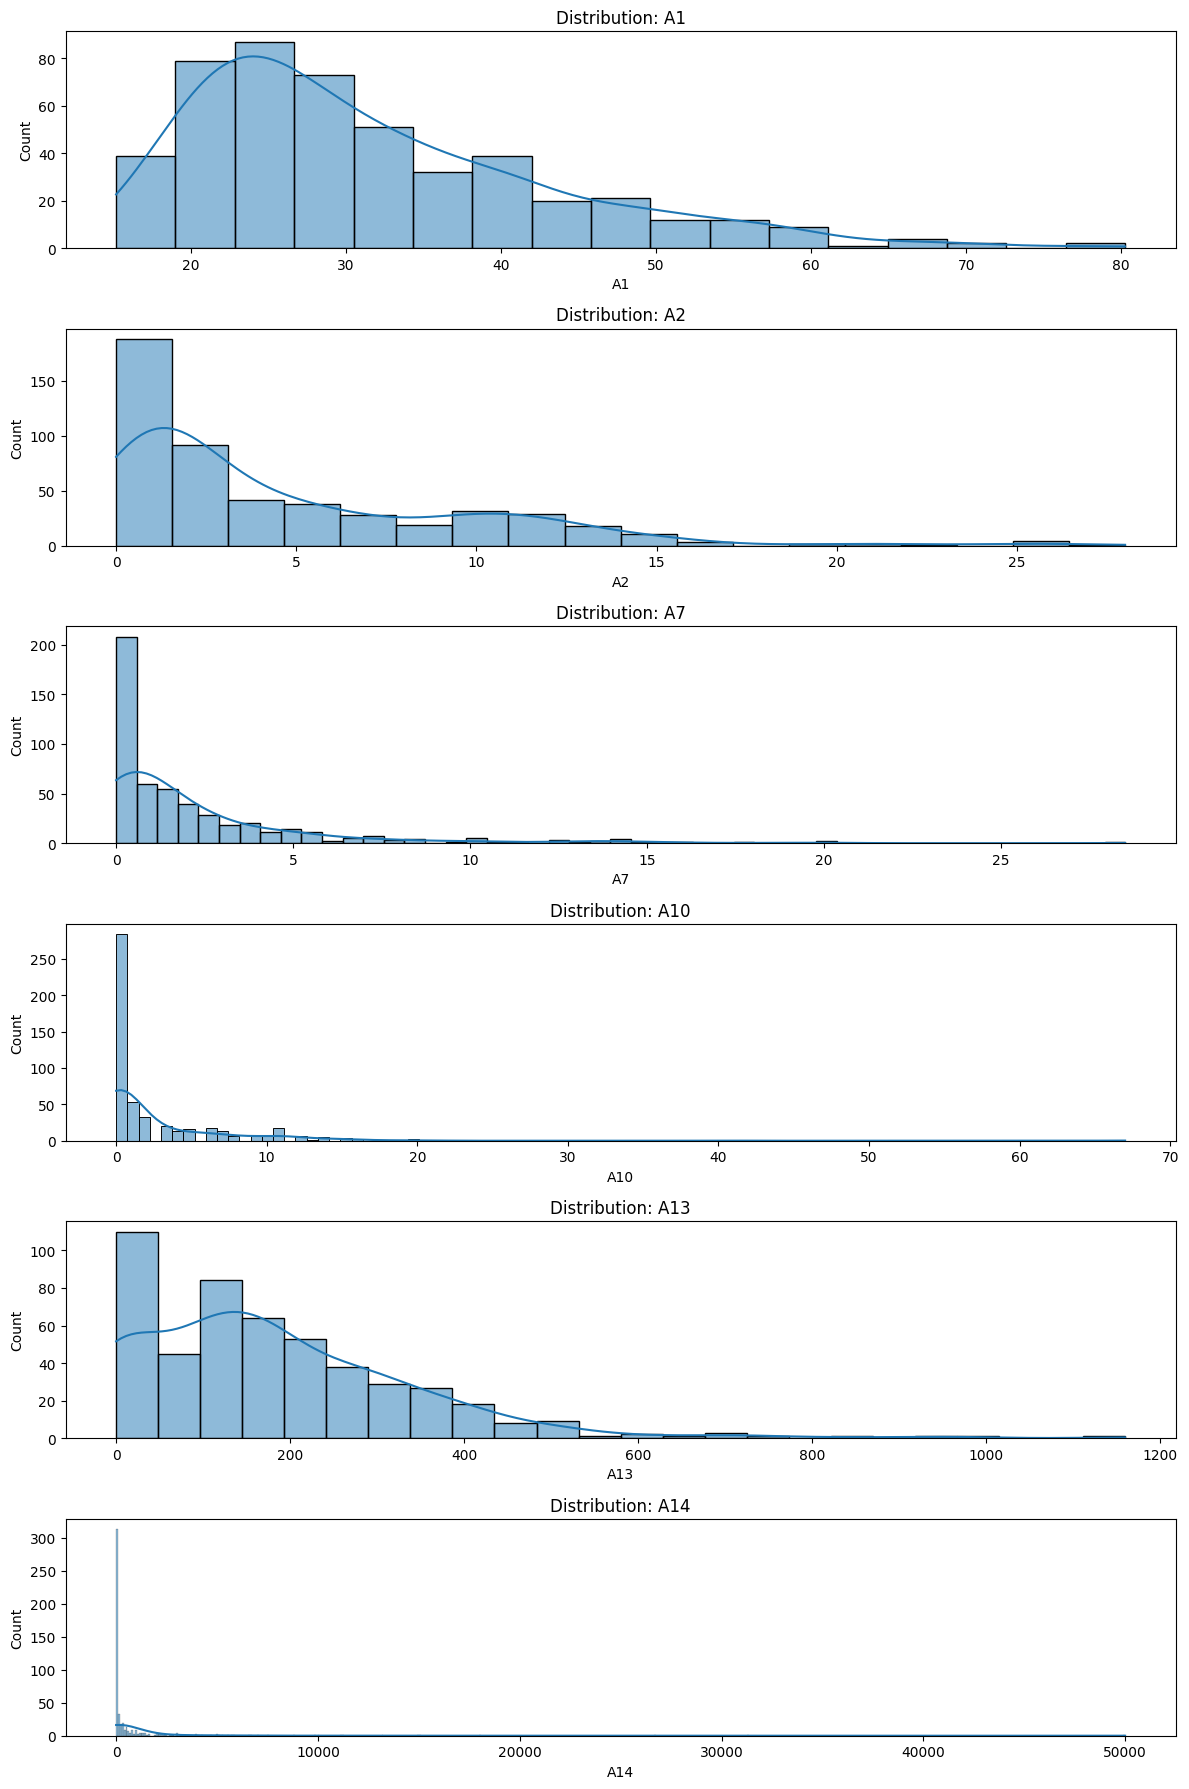

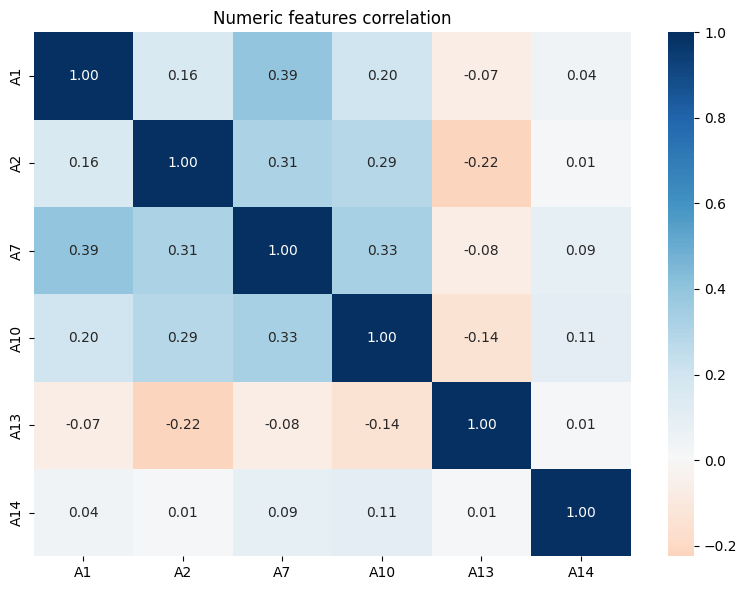

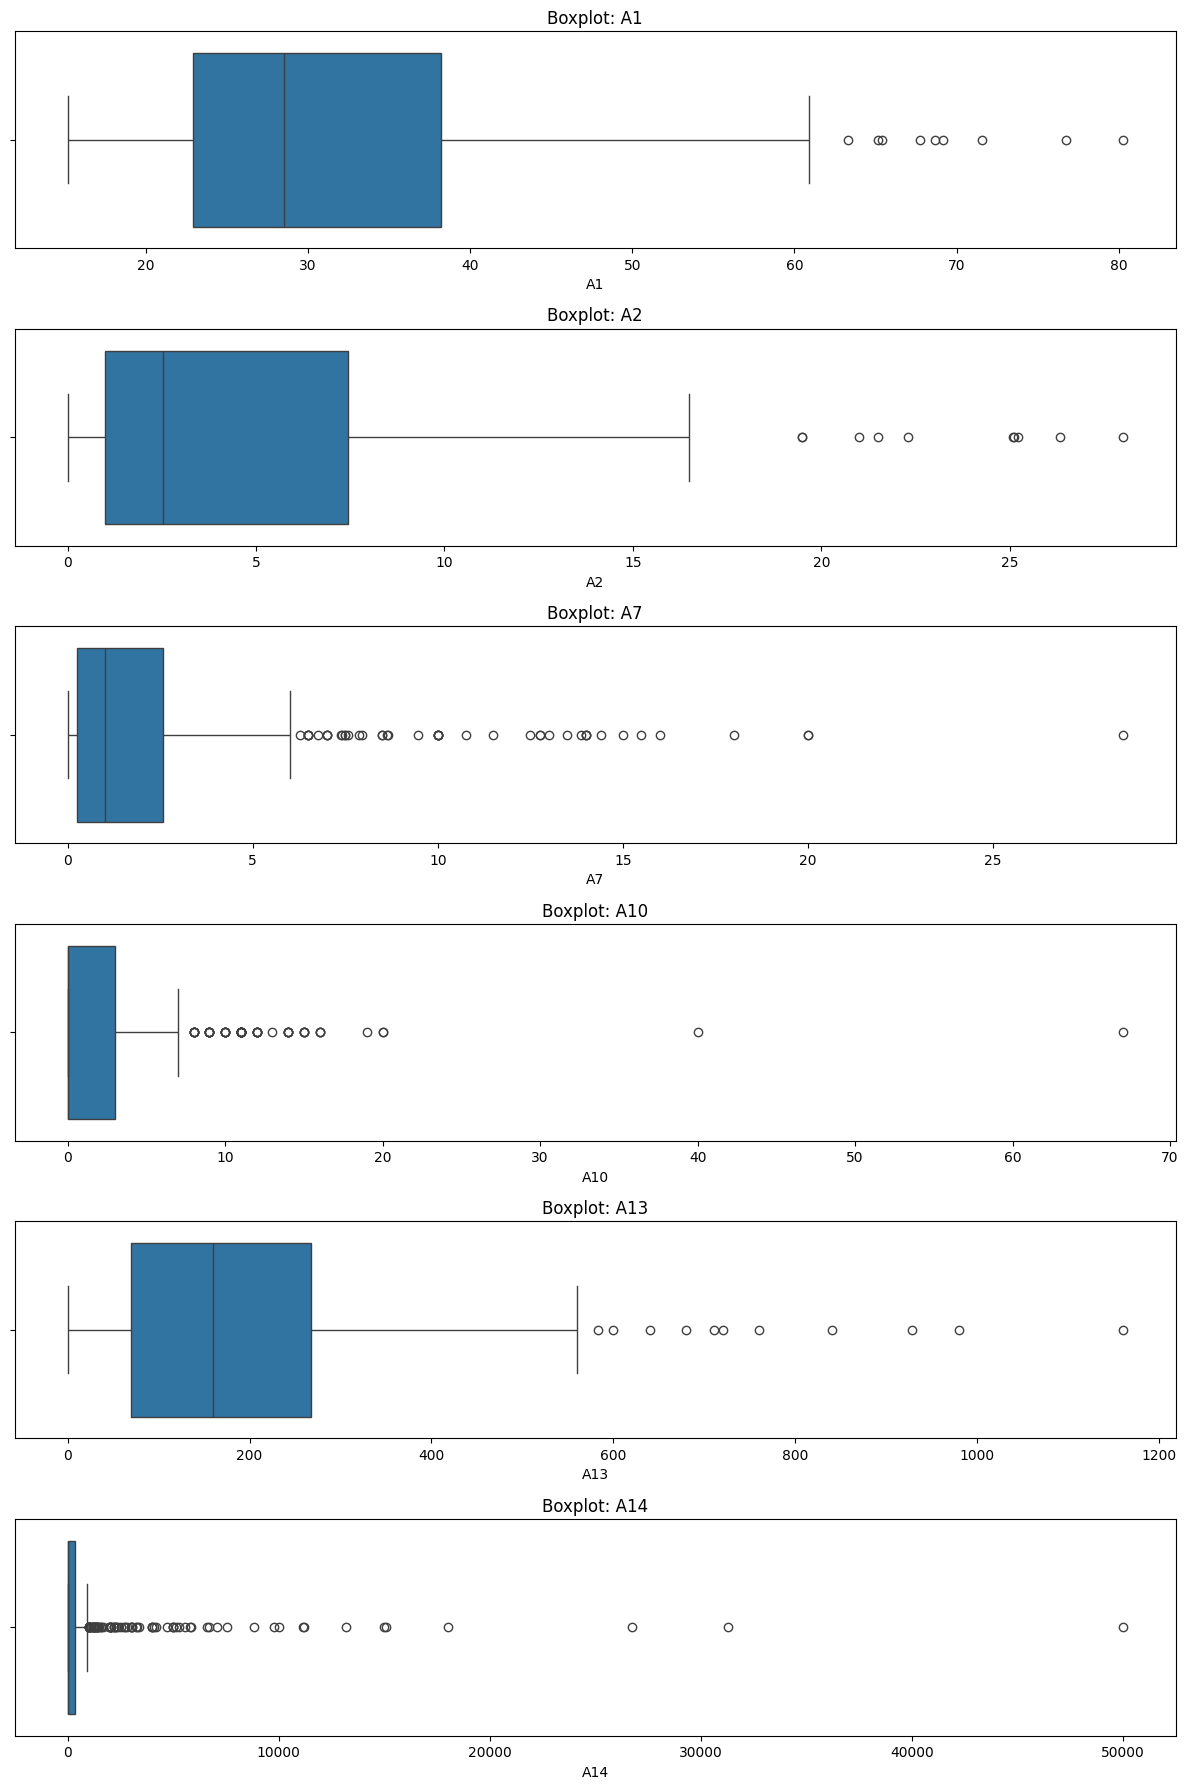


Categorical columns (8): ['A3', 'A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A12']

Top values for A3:
A3
u    389
y    105
l      1
Name: count, dtype: int64


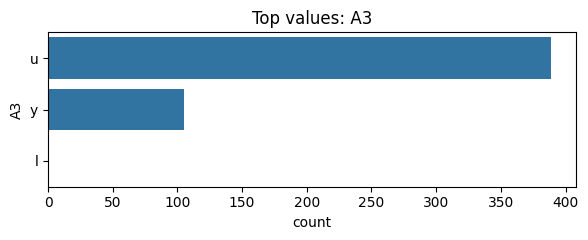


Top values for A4:
A4
g     390
p     104
gg      1
Name: count, dtype: int64


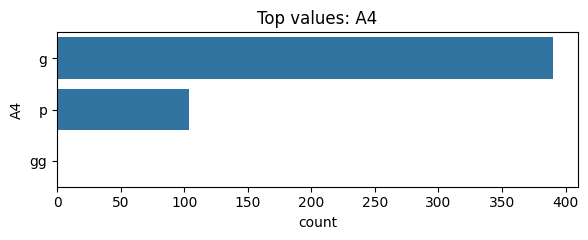


Top values for A5:
A5
c     100
q      60
w      46
i      39
ff     37
aa     37
k      35
cc     29
m      28
x      28
Name: count, dtype: int64


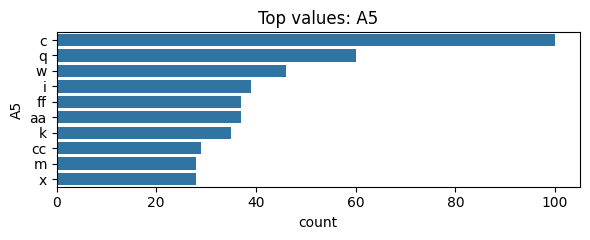


Top values for A6:
A6
v     285
h      95
ff     41
bb     40
z       8
j       6
dd      5
n       3
o       1
Name: count, dtype: int64


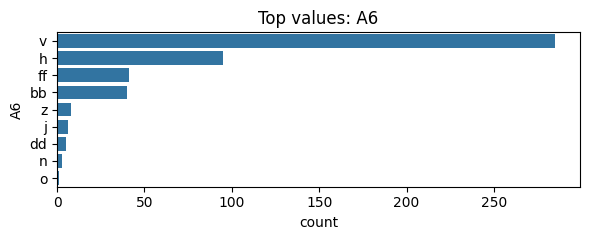


Top values for A8:
A8
t    272
f    238
Name: count, dtype: int64


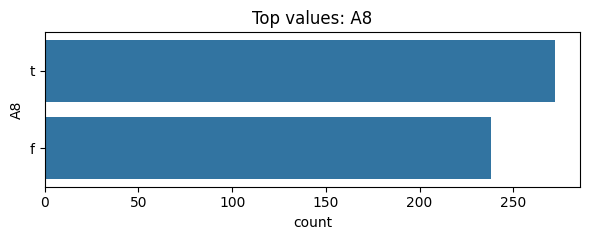


Top values for A9:
A9
f    284
t    226
Name: count, dtype: int64


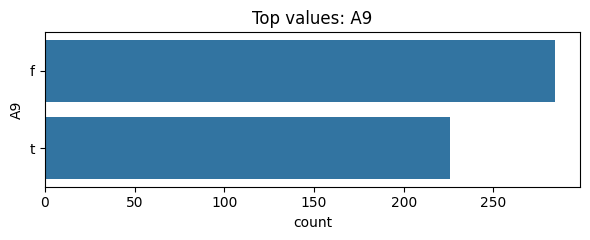

In [21]:
# YOUR CODE HERE

df = pd.read_csv(PATH_TO_TRAIN_FILE)
print(f"Loaded train data: {df.shape}")
display(df.head())

# Basic info
print("\nColumn types and non-null counts:")
print(df.info())

# Missing values
missing = df.isna().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("\nColumns with missing values:")
print(missing)

# Class distribution
if "class" in df.columns:
    print("\nClass distribution:")
    print(df["class"].value_counts())
    plt.figure(figsize=(5,3))
    sns.countplot(x="class", data=df)
    plt.title("Class distribution")
    plt.tight_layout()
    plt.show()

# Numeric feature overview
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if "class" in num_cols:
    num_cols.remove("class")

print(f"\nNumeric columns ({len(num_cols)}): {num_cols}")

if num_cols:
    sample_nums = num_cols[:6]
    plt.figure(figsize=(12, 3*len(sample_nums)))
    for i, c in enumerate(sample_nums, 1):
        plt.subplot(len(sample_nums), 1, i)
        sns.histplot(df[c].dropna(), kde=True)
        plt.title(f"Distribution: {c}")
    plt.tight_layout()
    plt.show()

    # Correlation heatmap (numeric)
    if len(num_cols) > 1:
        plt.figure(figsize=(8,6))
        sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="RdBu", center=0)
        plt.title("Numeric features correlation")
        plt.tight_layout()
        plt.show()

    # Simple boxplots to inspect outliers for first 6 numeric cols
    plt.figure(figsize=(12, 3*len(sample_nums)))
    for i, c in enumerate(sample_nums, 1):
        plt.subplot(len(sample_nums), 1, i)
        sns.boxplot(x=df[c].dropna())
        plt.title(f"Boxplot: {c}")
    plt.tight_layout()
    plt.show()
else:
    print("No numeric columns detected.")

# Categorical overview (small sample)
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
if "class" in cat_cols:
    cat_cols.remove("class")

print(f"\nCategorical columns ({len(cat_cols)}): {cat_cols}")
for c in cat_cols[:6]:
    print(f"\nTop values for {c}:")
    print(df[c].value_counts().head(10))
    plt.figure(figsize=(6,2.5))
    sns.countplot(y=c, data=df, order=df[c].value_counts().iloc[:10].index)
    plt.title(f"Top values: {c}")
    plt.tight_layout()
    plt.show()
# ...existing code...

# `q1` Data Loading, Preprocessing, and Feature Engineering

* You are free to perform any preprocessing and feature engineering you want.
* Populate the `Dataset` class with your preprocessing + feature engineering code.

### Grading:
* This question is not graded but will be used later in graded questions.

In [22]:
class Dataset:
    """
    CSV loader that returns X, y as numpy arrays for sklearn. Label column is 'class'.
    """

    def __init__(self, filepath: str, preprocessor: sklearn.compose.ColumnTransformer = None, do_fit: bool = True):
        """
        filepath: path to CSV with features + a label column named 'class'
        preprocessor: optional fitted sklearn ColumnTransformer (provide for test/hidden runs)
        do_fit: whether to fit the preprocessor on this data
        """
        self.filepath = filepath
        self.preprocessor = preprocessor
        self.features = None
        self.labels = None
        self._load_and_preprocess(do_fit)

    def _load_and_preprocess(self, do_fit: bool = True):
        """
        Load CSV, split on label 'class', apply (or fit+apply) preprocessor,
        and populate self.features, self.labels, self.feature_names, self.preprocessor.
        """
        # YOUR CODE HERE

        # Robust preprocessing compatible with different sklearn versions
        from sklearn.pipeline import Pipeline
        from sklearn.impute import SimpleImputer
        from sklearn.preprocessing import OneHotEncoder, StandardScaler
        from sklearn.compose import ColumnTransformer
        import scipy.sparse as sps

        # load CSV
        df = pd.read_csv(self.filepath)

        # separate label if present
        if "class" in df.columns:
            y = df["class"].to_numpy()
            X_df = df.drop(columns=["class"])
        else:
            y = None
            X_df = df.copy()

        # detect numeric and categorical columns
        numeric_cols = X_df.select_dtypes(include=[np.number]).columns.tolist()
        categorical_cols = X_df.select_dtypes(exclude=[np.number]).columns.tolist()

        # Frequency-encode high-cardinality categoricals to avoid huge one-hot matrices
        # Treat a column as high-cardinality if unique values > 20
        high_card_cols = []
        low_card_cols = []
        CARD_THRESHOLD = 20
        if categorical_cols:
            # preserve maps when fitting so test/hidden apply same mapping
            if do_fit:
                self.cat_freq_maps = {}
            for col in categorical_cols:
                n_unique = X_df[col].nunique(dropna=True)
                if n_unique > CARD_THRESHOLD:
                    high_card_cols.append(col)
                    if do_fit:
                        counts = X_df[col].fillna("__NA__").value_counts().to_dict()
                        self.cat_freq_maps[col] = counts
                    # map now (for both fit/transform if maps exist)
                    map_dict = self.cat_freq_maps.get(col) if hasattr(self, "cat_freq_maps") else None
                    if map_dict is not None:
                        X_df[col] = X_df[col].fillna("__NA__").map(map_dict).fillna(0).astype(float)
                    else:
                        # fallback: use raw counts from this frame
                        X_df[col] = X_df[col].fillna("__NA__").map(X_df[col].value_counts().to_dict()).fillna(0).astype(float)
                    # new numeric column now
                    numeric_cols.append(col)
                else:
                    low_card_cols.append(col)

        # numeric pipeline (includes freq-encoded cols)
        # add missing indicator to help some models
        num_pipe = Pipeline([
            ("imputer", SimpleImputer(strategy="median", add_indicator=True)),
            ("scaler", StandardScaler())
        ])

        # categorical pipeline: only for low-cardinality categories (one-hot)
        ohe = OneHotEncoder(handle_unknown="ignore")
        cat_pipe = Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("ohe", ohe)
        ])

        transformers = []
        if numeric_cols:
            transformers.append(("num", num_pipe, numeric_cols))
        if low_card_cols:
            transformers.append(("cat", cat_pipe, low_card_cols))

        preprocessor = ColumnTransformer(transformers=transformers, remainder="drop")

        # fit or transform
        if do_fit or (self.preprocessor is None):
            X_trans = preprocessor.fit_transform(X_df)
            self.preprocessor = preprocessor
        else:
            # ensure freq-maps exist when transforming
            if hasattr(self, "cat_freq_maps"):
                # apply maps to any high-card columns in new frame
                for col in high_card_cols:
                    if col in X_df.columns:
                        X_df[col] = X_df[col].fillna("__NA__").map(self.cat_freq_maps.get(col, {})).fillna(0).astype(float)
            X_trans = self.preprocessor.transform(X_df)

        # if returned matrix is sparse convert to dense array (required for later np.asarray and sklearn models)
        try:
            if sps.issparse(X_trans):
                X_trans = X_trans.toarray()
        except Exception:
            pass

        # construct feature names
        feature_names = []
        if numeric_cols:
            # numeric cols after imputer with indicator: add "_missing_indicator" for each imputed column
            feature_names.extend(numeric_cols)
            # note: SimpleImputer(add_indicator=True) adds extra boolean columns at end per column; we'll not enumerate them precisely (optional)
        if low_card_cols:
            cat_feature_names = []
            try:
                if hasattr(self.preprocessor, "named_transformers_") and "cat" in self.preprocessor.named_transformers_:
                    cat_tr = self.preprocessor.named_transformers_["cat"]
                    if hasattr(cat_tr, "named_steps"):
                        ohe_fitted = cat_tr.named_steps.get("ohe", cat_tr)
                    else:
                        ohe_fitted = cat_tr
                    try:
                        cat_feature_names = ohe_fitted.get_feature_names_out(low_card_cols).tolist()
                    except AttributeError:
                        cat_feature_names = ohe_fitted.get_feature_names(low_card_cols).tolist()
                else:
                    cat_feature_names = self.preprocessor.get_feature_names_out(low_card_cols).tolist()
            except Exception:
                for col in low_card_cols:
                    vals = pd.Series(X_df[col].dropna().unique()).astype(str).tolist()
                    if len(vals) > 50:
                        vals = vals[:50]
                    cat_feature_names.extend([f"{col}__{v}" for v in vals])
            feature_names.extend(cat_feature_names)

        # finalize
        self.features = np.asarray(X_trans)
        self.labels = None if y is None else np.asarray(y)
        self.feature_names = feature_names
        self.preprocessor = self.preprocessor

        

    def get_features_and_labels(self):
        """
        Return (X, y) where X is 2D numpy array and y is 1D numpy array.
        """
        return self.features, self.labels


In [23]:
# =======================
# DO NOT MODIFY THIS CELL
# =======================

train_ds = Dataset(PATH_TO_TRAIN_FILE, do_fit=True)
X_train, y_train = train_ds.get_features_and_labels()

test_ds = Dataset(
    PATH_TO_STUDENT_TEST_FILE,
    preprocessor=train_ds.preprocessor,
    do_fit=False
)
X_test, y_test = test_ds.get_features_and_labels()

hidden_ds = Dataset(
    PATH_TO_HIDDEN_TEST_SAMPLE_FILE,
    preprocessor=train_ds.preprocessor,
    do_fit=False
)
X_hidden, y_hidden = hidden_ds.get_features_and_labels()

print(f"[Train] X: {X_train.shape}, y: {y_train.shape}")
print(f"[Student Test] X: {X_test.shape}, y: {y_test.shape}")
print(f"[Hidden SAMPLE] X: {X_hidden.shape}, y: {y_hidden}") # NOTE: this is not the full hidden test set; only 3 rows and will not contain labels

[Train] X: (510, 46), y: (510,)
[Student Test] X: (52, 46), y: (52,)
[Hidden SAMPLE] X: (3, 46), y: None


# `q2` Model Training and Evaluation

* The `ModelTrainer` class is already implemented for you and does not need to be modified.
* Your task in the following questions will be to define and implement three functions: `get_decision_tree_classifier`, `get_boosting_classifier`, and `get_svm_classifier`.  
* Inside each of these functions, you will instantiate the corresponding scikit-learn model and tune its hyperparameters to achieve the best performance.


### Grading:
* Your final grade for each of the three models (**Decision Tree**, **Gradient Boosting**, and **SVM**) will be based on its F1-score on the hidden test set, according to the rubric below. The maximum score for each model is 2 marks.

    | F1-Score on Hidden Test Set | Marks Awarded |
    | :-------------------------: | :-----------: |
    |        `0.95 - 1.00`        |      2.0      |
    |        `0.90 - 0.94`        |      1.5      |
    |        `0.85 - 0.89`        |      1.0      |
    |        `0.75 - 0.84`        |      0.5      |
    |          `< 0.75`           |      0.0      |
        

In [24]:
# =======================
# DO NOT MODIFY THIS CELL
# =======================

class ModelTrainer:
    """
    Trains, evaluates, and runs predictions with a scikit-learn classifier,
    taking Dataset objects as direct input.
    """

    def __init__(self, classifier):
        """
        Initializes the trainer with an unfitted sklearn classifier object.
        """
        if not all(hasattr(classifier, attr) for attr in ['fit', 'predict']):
            raise TypeError("The provided object is not a valid sklearn classifier.")
        self.classifier = classifier
        self.training_feature_names = None

    def train(self, train_dataset):
        """
        Fits the classifier on the provided training Dataset object.
        """
        X_train, y_train = train_dataset.get_features_and_labels()
        self.training_feature_names = train_dataset.feature_names
        self.classifier.fit(X_train, y_train)

    def evaluate(self, test_dataset, title_prefix: str = ""):
        """
        Evaluates the trained classifier on a test Dataset object.
        """
        if not hasattr(self.classifier, "classes_"):
            raise ValueError("Classifier has not been trained. Call .train() first.")

        X_test, y_test = test_dataset.get_features_and_labels()
        y_pred = self.classifier.predict(X_test)

        acc = sklearn.metrics.accuracy_score(y_test, y_pred)
        pre = sklearn.metrics.precision_score(y_test, y_pred, zero_division=0)
        rec = sklearn.metrics.recall_score(y_test, y_pred, zero_division=0)
        f1 = sklearn.metrics.f1_score(y_test, y_pred, zero_division=0)

        model_name = self.classifier.__class__.__name__
        header = f"{title_prefix} {model_name} Results".strip()
        print(header)
        print("-" * len(header))
        print(f"Accuracy : {acc:.4f}")
        print(f"Precision: {pre:.4f}")
        print(f"Recall   : {rec:.4f}")
        print(f"F1-score : {f1:.4f}")

        cm = sklearn.metrics.confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(4.5, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=self.classifier.classes_, yticklabels=self.classifier.classes_)
        plt.title(f"{model_name} Confusion Matrix ({title_prefix.strip()})")
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.tight_layout()
        plt.show()

    def predict(self, dataset):
        """
        Generates predictions for a given Dataset object.
        """
        if not hasattr(self.classifier, "classes_"):
            raise ValueError("Classifier has not been trained. Call .train() first.")

        X_features, _ = dataset.get_features_and_labels()
        return self.classifier.predict(X_features)

In [25]:
def get_decision_tree_classifier() -> sklearn.tree.DecisionTreeClassifier:
    """
    Return a DecisionTreeClassifier with student-selected hyperparameters.
    """
    clf = None
    # YOUR CODE HERE
    from sklearn.tree import DecisionTreeClassifier
    # use class balance and mild regularization
    clf = DecisionTreeClassifier(random_state=42, criterion="gini",
                                 max_depth=7, min_samples_leaf=6, class_weight="balanced")
                
    return clf

In [26]:
def get_boosting_classifier() -> sklearn.ensemble.GradientBoostingClassifier:
    """
    Return a GradientBoostingClassifier with student-selected hyperparameters.
    """
    clf = None
    # YOUR CODE HERE
    try:
        # Prefer HistGradientBoosting if available (faster, supports early stopping & class_weight)
        from sklearn.ensemble import HistGradientBoostingClassifier
        clf = HistGradientBoostingClassifier(max_iter=500, learning_rate=0.05,
                                             max_depth=8, early_stopping=True,
                                             random_state=42, verbose=0, class_weight="balanced")
    except Exception:
        from sklearn.ensemble import GradientBoostingClassifier
        clf = GradientBoostingClassifier(n_estimators=400, learning_rate=0.03,
                                         max_depth=4, subsample=0.8, random_state=42)
    return clf

In [27]:
def get_svm_classifier() -> sklearn.svm.SVC:
    """
    Return an SVC (Support Vector Classifier) with student-selected hyperparameters.
    """
    clf = None
    # YOUR CODE HERE
    from sklearn.svm import SVC
    # RBF kernel with class balancing; data is scaled in preprocessing
    clf = SVC(kernel="rbf", C=1.5, gamma="scale", class_weight="balanced", probability=False)
    return clf

Visible Test DecisionTreeClassifier Results
-------------------------------------------
Accuracy : 0.8077
Precision: 0.7273
Recall   : 0.8000
F1-score : 0.7619


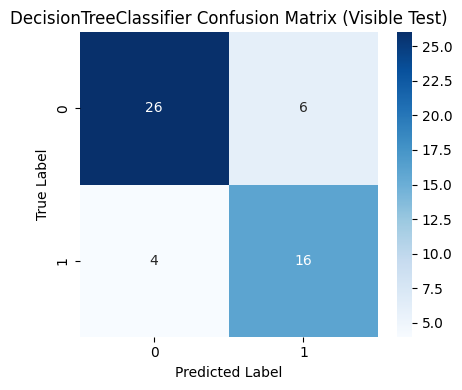

Visible Test HistGradientBoostingClassifier Results
---------------------------------------------------
Accuracy : 0.7692
Precision: 0.7000
Recall   : 0.7000
F1-score : 0.7000


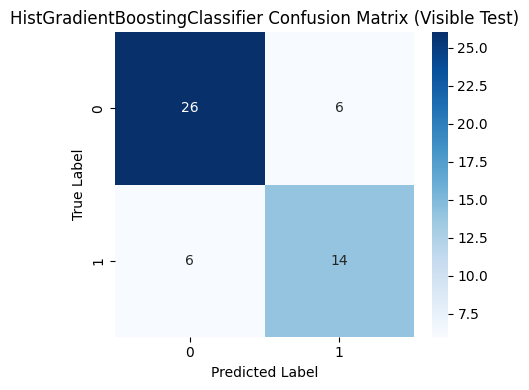

Visible Test SVC Results
------------------------
Accuracy : 0.7885
Precision: 0.7143
Recall   : 0.7500
F1-score : 0.7317


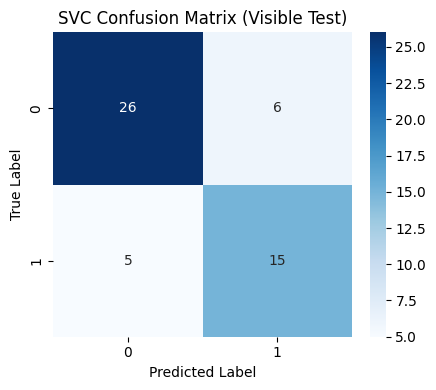

In [28]:
train_dataset = Dataset(PATH_TO_TRAIN_FILE, do_fit=True)
test_dataset = Dataset(PATH_TO_STUDENT_TEST_FILE, preprocessor=train_dataset.preprocessor, do_fit=False)
hidden_dataset = Dataset(PATH_TO_HIDDEN_TEST_SAMPLE_FILE, preprocessor=train_dataset.preprocessor, do_fit=False)

dt_trainer = ModelTrainer(get_decision_tree_classifier())
dt_trainer.train(train_dataset)
dt_trainer.evaluate(test_dataset, title_prefix="Visible Test")
dt_predictions = dt_trainer.predict(hidden_dataset)

gb_trainer = ModelTrainer(get_boosting_classifier())
gb_trainer.train(train_dataset)
gb_trainer.evaluate(test_dataset, title_prefix="Visible Test")
gb_predictions = gb_trainer.predict(hidden_dataset)

svm_trainer = ModelTrainer(get_svm_classifier())
svm_trainer.train(train_dataset)
svm_trainer.evaluate(test_dataset, title_prefix="Visible Test")
svm_predictions = svm_trainer.predict(hidden_dataset)